<a href="https://colab.research.google.com/github/ridvanyigit/NLP/blob/main/NLP_Preprocessing(SpaCy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import spacy
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/refs/heads/master/twitter4000.csv', encoding='latin-1')

In [ ]:
df.head()

,tweets,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
0,2000
1,2000


> #### **Word Counts**

In [ ]:
x = 'this is text'
len(x)

12

In [ ]:
x.split()

['this', 'is', 'text']

In [ ]:
len(x.split())

3

In [ ]:
len(str(x).split())

3

In [ ]:
df['tweets']

,tweets
0,is bored and wants to watch a movie any sugge...
1,back in miami. waiting to unboard ship
2,"@misskpey awwww dnt dis brng bak memoriessss, ..."
3,ughhh i am so tired blahhhhhhhhh
4,@mandagoforth me bad! It's funny though. Zacha...
...,...
3995,i just graduated
3996,Templating works; it all has to be done
3997,mommy just brought me starbucks
3998,@omarepps watching you on a House re-run...lov...


In [ ]:
df['word_counts'] = df['tweets'].apply(lambda x: len(str(x).split()))

In [ ]:
df.sample(5)

,tweets,sentiment,word_counts
2086,4hrs of sleep and saved bt the bell marathon f...,1,13
0,is bored and wants to watch a movie any sugge...,0,10
3406,another wholesale enquiry,1,3
1640,@koa LOL Are they going to fix the phone situ...,0,11
78,has used more moisturer today than all the oth...,0,17


In [ ]:
df['word_counts'].max()

32

In [ ]:
df['word_counts'].min()

1

In [ ]:
df[df['word_counts']==1]

,tweets,sentiment,word_counts
385,homework,0,1
691,@ekrelly,0,1
1124,disappointed,0,1
1286,@officialmgnfox,0,1
1325,headache,0,1
1897,@MCRmuffin,0,1
2542,Graduated!,1,1
2947,reading,1,1
3176,@omeirdeleon,1,1
3470,www.myspace.com/myfinalthought,1,1


> #### **Characters Count**

In [ ]:
x = 'this is text'
len(x)

12

In [ ]:
def char_count(x):
    s = x.split()
    x = ''.join(s)
    return len(x)

In [ ]:
char_count(x)

10

In [ ]:
df['char_count'] = df['tweets'].apply(lambda x: char_count(str(x)))

In [ ]:
df.sample(5)

,tweets,sentiment,word_counts,char_count
148,@jmarie7481 Hahahahaha... I know you're not. S...,0,24,100
2756,@Thebombshell u should follow me,1,5,28
2759,@paigeandhagen thanks . I have a lot of those.,1,9,38
1056,Okay I Was Going To Sleep; But Isabella's Cryi...,0,12,48
689,@Annnnnaaaaa and apparently neither is Sir Allen,0,7,42


> #### **Average Word Length**

In [ ]:
# Character Count / Word Count = Average Word Length
a = 'this is' # 6/2 = 3
b = 'thankyou guys' # 12/2 = 6

In [ ]:
df['avg_word_len'] = df['char_count']/df['word_counts']

In [ ]:
df.sample(5)

,tweets,sentiment,word_counts,char_count,avg_word_len
3349,@inklesstales I have a feeling you should stan...,1,20,108,5.400000
246,"@halbpro Dude, I feel for you. In this heat.",0,9,36,4.000000
1990,I FEEL SO..... REPLACED.,0,4,21,5.250000
2191,@mulder8scully5 and because you know you want to,1,8,41,5.125000
753,Working out my relationship issues with Kaze. ...,0,13,69,5.307692


> #### **Stop Words Count**

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [ ]:
print(stopwords)

{'without', 'off', '’ll', 'show', 'you', 'at', 'how', 'this', 'do', 'that', 'along', 'see', 'which', 'anywhere', 'yet', 'toward', 'former', 'whoever', 'before', 'hereby', 'others', 'anyhow', 'therein', 'together', 'another', 'whatever', 'almost', 'was', 'last', '‘m', '’re', 'much', 'hereupon', 'whereby', 'as', 'also', 'about', 'whom', 'otherwise', 'yours', 'sometimes', 'thereafter', 'six', 'again', 'though', 'been', 'am', 'except', 'seems', 'please', 'eleven', 'out', 'becoming', 'whole', 'beside', 'go', 'both', 'somewhere', 'his', 'even', 'amount', 'if', 'ca', 'forty', 'serious', 'hereafter', 'well', 'its', 'enough', 'over', 'in', 'for', 'has', 'rather', 'did', 'we', 'nevertheless', 'fifteen', 'herein', 'they', 'he', 'noone', 'himself', 'everywhere', 'and', "'m", 'within', 'other', '’m', 'can', 'every', 'becomes', 'now', 'everyone', 'once', 'beyond', 'some', 'whither', 'seeming', 'yourselves', 'wherein', '‘ve', 'full', 'then', 'with', 'might', 'n‘t', 'nor', 'several', 'anyone', "'ve", 

In [ ]:
len(stopwords)

326

In [ ]:
x = 'this is a text'

In [ ]:
x.split()

['this', 'is', 'a', 'text']

In [ ]:
[t for t in x.split() if t in stopwords]

['this', 'is', 'a']

In [ ]:
len([t for t in x.split() if t in stopwords])

3

In [ ]:
df['stop_words_len'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t in stopwords]))

In [ ]:
df.sample(5)

,tweets,sentiment,word_counts,char_count,avg_word_len,stop_words_len
1868,ps. i somehow lost my semester screen print?!,0,8,38,4.750000,3
1699,Why can't I watch LOST in Japan?,0,7,26,3.714286,1
2414,Boris Kodjoe.... what a specimen,1,5,28,5.600000,2
1928,@madcatdisease Standard maintenance usually is...,0,9,68,7.555556,2
2733,we just &quot;coincidently&quot; seem to be th...,1,7,43,6.142857,6


> #### **Count #HashTags and @Mentions**

In [ ]:
x = 'this is a #hashtag and this is @mention'

In [ ]:
x.split()

['this', 'is', 'a', '#hashtag', 'and', 'this', 'is', '@mention']

In [ ]:
[t for t in x.split() if t.startswith('#')]

['#hashtag']

In [ ]:
len([t for t in x.split() if t.startswith('#')])

1

In [ ]:
df['hashtags_count'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))

In [ ]:
df.sample(5)

,tweets,sentiment,word_counts,char_count,avg_word_len,stop_words_len,hashtags_count
3444,"@CYHSYtheband I shall dance, but I really want...",1,15,69,4.600000,3,0
307,@coleybell yeahh dont worry you will! and awww...,0,17,73,4.294118,6,0
3099,"@AlliOutlaw fuck Im sorry, you should of said ...",1,14,67,4.785714,4,0
3117,Adios twitter bugs,1,3,16,5.333333,0,0
378,@elzibelz why can we not get over stuff like t...,0,30,102,3.400000,14,0


In [ ]:
df['mentions_count'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [ ]:
df.sample(5)

,tweets,sentiment,word_counts,char_count,avg_word_len,stop_words_len,hashtags_count,mentions_count
3797,Live chat with @chrishansen and little less th...,1,23,104,4.521739,11,1,1
1994,@staceyandeen: Good luck with that. We didn't ...,0,21,109,5.190476,9,0,1
712,"@Vampire_Ayna Buhu, what am I getting myself i...",0,10,52,5.200000,4,0,1
126,Couldn't get moving this morning. Working in t...,0,14,65,4.642857,7,0,0
2433,Painting my nails orange at 2 am... texting my...,1,19,78,4.105263,7,0,0


> #### **Numeric Digits Count**

In [ ]:
x = 'this is 1 and 2'

In [ ]:
x.split()

['this', 'is', '1', 'and', '2']

In [ ]:
x.split()[2].isdigit()

True

In [ ]:
[t for t in x.split() if t.isdigit()]

['1', '2']

In [ ]:
len([t for t in x.split() if t.isdigit()])

2

In [ ]:
df['numerics_count'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [ ]:
df['numerics_count'].value_counts()

,count
numerics_count,
0,3730
1,225
2,38
3,5
4,2


> #### **UPPER Case Words Count**

In [ ]:
x = 'I AM HAPPY'
y = 'i am happy'

In [ ]:
[t for t in x.split() if t.isupper()]

['I', 'AM', 'HAPPY']

In [ ]:
len([t for t in x.split() if t.isupper()])

3

In [ ]:
df['upper_counts'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.isupper()]))

In [ ]:
df.sample(5)

,tweets,sentiment,word_counts,char_count,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
3794,time for me to finish work and go home. 12 hou...,1,23,83,3.608696,10,0,0,1,0
54,@j_kmrprez yeah I want be able to until next y...,0,10,47,4.700000,4,0,1,0,1
2007,@MZ_KISS LOL wassup mamasz,1,4,23,5.750000,0,0,1,0,2
2907,@Violetlilly That was great! Thanks! I haven't...,1,12,63,5.250000,3,0,1,0,1
1436,"@laurapearl ok, you win. or lose, as it appears.",0,9,40,4.444444,4,0,1,0,0


In [ ]:
df.iloc[1442]['tweets']

"MBP screen won't turn on. Guess I'll take it to the mac DR in the morning. "

# **PREPROCESSING AND CLEANING**

> #### **Lower Case Conversation**

In [ ]:
x = 'This is a Text'

In [ ]:
x.lower()

'this is a text'

In [ ]:
y = 45.0

In [ ]:
str(y).lower()

'45.0'

In [ ]:
df['tweets'] = df['tweets'].apply(lambda x: str(x).lower())

In [ ]:
df.sample(5)

,tweets,sentiment,word_counts,char_count,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
2510,@dcamacho now i got @thecigarspy followed also...,1,21,85,4.047619,10,0,2,1,0
3468,happy 17th of may!!!,1,4,17,4.250000,1,0,0,0,0
2224,@whizkidd all credit to u my friend.. i got ...,1,12,48,4.000000,5,0,1,0,0
1953,@errinmerrrill no even worse. the party till y...,0,11,53,4.818182,4,0,1,0,0
467,my ankles hurting! owww can't walk on it,0,8,33,4.125000,2,0,0,0,0


> #### **Constraction to Expansion**

In [ ]:
constraction = {
  "ain't": "am not",
  "aren't": "are not",
  "bak": "back",
  "brng": "bring",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "didn't": "did not",
  "dis": "this",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "i'm": "i am",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  " n ": "end",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  " u ": "you",
  " ur ": "your",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

In [ ]:
x = "i'm don't he'll"       # i am do not he will

In [ ]:
def con_to_exp(x):
    if type(x) is str:
        for key, value in constraction.items():
            x = x.replace(key, value)
        return x
    return x

In [ ]:
con_to_exp(x)

'i am do not he will'

In [ ]:
%%timeit
df['tweets'] = df['tweets'].apply(lambda x: con_to_exp(x))

497 ms ± 164 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
df.sample(5)

,tweets,sentiment,word_counts,char_count,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
856,@i_am_heather some guys just seem able to grow...,0,22,103,4.681818,10,0,1,0,0
1555,@ my dads bored as crap he dont have a tv or i...,0,30,111,3.700000,13,0,1,0,0
3593,@tommcfly sorry you are having a bad day.. yo...,1,18,78,4.333333,6,0,1,0,0
1375,all the managers are gone today!!! yay! i thin...,0,15,57,3.800000,8,0,0,0,0
2276,@hibiscuit any of your decisions is a good one...,1,14,63,4.500000,7,0,1,0,0


> #### **Count and Remove Emails**

In [ ]:
import re

In [ ]:
df['tweets']

,tweets
0,is bored and wants to watch a movie any sugge...
1,back in miami. waiting to unboard ship
2,@misskpey awwww dnt this bring back memoriesss...
3,ughhh i am so tired blahhhhhhhhh
4,@mandagoforth me bad! it is funny though. zach...
...,...
3995,i just graduated
3996,templating works; it all has to be done
3997,mommy just brought me starbucks
3998,@omarepps watching you on a house re-run...lov...


In [ ]:
df['tweets'][df['tweets'].str.contains('gmail.com')]

,tweets
2448,"when i click my firefox 'most visited' tab, af..."


In [ ]:
df.iloc[2448]['tweets']

"when i click my firefox 'most visited' tab, after my gmail comes 'twitter / over capacity' nice "

In [ ]:
df['tweets'][df['tweets'].str.contains('hotmail.com')]

,tweets
3713,@securerecs arghh me please markbradbury_16@h...


In [ ]:
df.iloc[3713]['tweets']

'@securerecs arghh me please  markbradbury_16@hotmail.com'

In [ ]:
x = '@securerecs arghh me please  markbradbury_16@hotmail.com'

In [ ]:
re.findall(r'[a-z0-9+.-_]+@[a-z0-9+.-_]+\.[a-z0-9+.-_]+', x)

['markbradbury_16@hotmail.com']

In [ ]:
df['emails'] = df['tweets'].apply(lambda x: re.findall(r'[a-z0-9+.-_]+@[a-z0-9+.-_]+\.[a-z0-9+.-_]+', x))

In [ ]:
df['emails_count'] = df['emails'].apply(lambda x: len(x))

In [ ]:
(df['emails_count']>0).value_counts()

,count
emails_count,
False,3999
True,1


In [ ]:
df[df['emails_count']>0]

,tweets,sentiment,word_counts,char_count,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51,10.2,0,0,1,0,0,[markbradbury_16@hotmail.com],1


In [ ]:
#remove emails
re.sub(r'[a-z0-9+.-_]+@[a-z0-9+.-_]+\.[a-z0-9+.-_]+', '', x).strip()

'@securerecs arghh me please'

In [ ]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(r'[a-z0-9+.-_]+@[a-z0-9+.-_]+\.[a-z0-9+.-_]+', '', x))

In [ ]:
df[df['emails_count']>0]

,tweets,sentiment,word_counts,char_count,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
3713,@securerecs arghh me please,1,5,51,10.2,0,0,1,0,0,[markbradbury_16@hotmail.com],1


In [ ]:
df['tweets'].iloc[3713]

'@securerecs arghh me please  '

> #### **Count URL and Remove it**

count

In [ ]:
x = 'hi, thanks to watching to it. for more visit https://youtube.com/NLP-Preprocessing'

In [ ]:
re.findall(r"(http|https|ftp|ssh)://([\w_-]+(?:\.[\w_-]+)+)([\w.,@?^=%&:/~+#-]*)?", x)

[('https', 'youtube.com', '/NLP-Preprocessing')]

In [ ]:
df['url_flags'] = df['tweets'].apply(lambda x: len(re.findall(r"(http|https|ftp|ssh)://([\w_-]+(?:\.[\w_-]+)+)([\w.,@?^=%&:/~+#-]*)?", x)))

In [ ]:
df[df['url_flags']>0]

,tweets,sentiment,word_counts,char_count,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
16,@brianquest i made 1 foyou2: http://bit.ly/eid...,0,19,81,4.263158,3,0,1,1,3,[],0,1
98,heading to work http://twitpic.com/4eojz,0,4,37,9.250000,1,0,0,0,0,[],0,1
99,@blondeblogger http://twitpic.com/4w8hk - i am...,0,10,62,6.200000,4,0,1,0,0,[],0,1
144,i miss you ã¢ââ« http://blip.fm/~8lc2f,0,5,35,7.000000,1,0,0,0,2,[],0,1
183,photo: miss germany http://tumblr.com/xf825f012,0,4,44,11.000000,0,0,0,0,0,[],0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,new staark video of &quot;sweet release&quot; ...,1,20,118,5.900000,4,0,0,0,1,[],0,1
3826,http://tinyurl.com/kwmynq helmet - unsung to s...,1,9,76,8.444444,2,0,0,0,0,[],0,2
3837,@r0ckergirl14 wow sweet again!! http://twitpi...,1,5,52,10.400000,0,0,1,0,0,[],0,1
3958,someone has been creative with my #deskmess wh...,1,13,91,7.000000,7,1,1,0,0,[],0,1


remove

In [ ]:
x

'hi, thanks to watching to it. for more visit https://youtube.com/NLP-Preprocessing'

In [ ]:
re.sub(r"(http|https|ftp|ssh)://([\w_-]+(?:\.[\w_-]+)+)([\w.,@?^=%&:/~+#-]*)?", '' , x).strip()

'hi, thanks to watching to it. for more visit'

In [ ]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(r"(http|https|ftp|ssh)://([\w_-]+(?:\.[\w_-]+)+)([\w.,@?^=%&:/~+#-]*)?", '' , x))

In [ ]:
df.sample(5)

,tweets,sentiment,word_counts,char_count,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
220,@vishuxpert he he he.... sorry cant help you o...,0,15,75,5.000000,5,0,1,0,1,[],0,0
581,a/c still not working.,0,4,19,4.750000,2,0,0,0,0,[],0,0
135,@allissmith haha yeah 2day was 2 b end-o-year ...,0,22,113,5.136364,3,0,1,1,1,[],0,0
3176,@omeirdeleon,1,1,12,12.000000,0,0,1,0,0,[],0,0
15,@sfannah ahhhhh well at least i am up to!,0,8,33,4.125000,3,0,1,0,0,[],0,0


> #### **Remove RT (ReTweet)**

In [ ]:
df[df['tweets'].str.contains('rt')]

,tweets,sentiment,word_counts,char_count,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
4,@mandagoforth me bad! it is funny though. zach...,0,26,116,4.461538,13,0,2,0,0,[],0,0
23,"ut oh, i wonder if the ram on the desktop is s...",0,14,46,3.285714,7,0,0,0,2,[],0,0
59,@paulmccourt dunno what sky you are looking at...,0,15,80,5.333333,3,0,1,0,0,[],0,0
75,im back home in belfast im realli tired thoug...,0,22,84,3.818182,9,0,0,0,1,[],0,0
81,@lilmonkee987 i know what you mean... i feel s...,0,11,48,4.363636,5,0,1,0,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,for the press so after she recovered she kille...,1,24,100,4.166667,1,0,0,0,0,[],0,0
3919,earned her cpr &amp; first aid certifications!,1,7,40,5.714286,1,0,0,0,1,[],0,0
3945,"@teciav &quot;i look high, i look low, i look ...",1,23,106,4.608696,10,0,1,0,0,[],0,0
3951,i am soo very parched. and hungry. oh and i am...,1,21,87,4.142857,7,0,0,2,1,[],0,0


In [ ]:
x = 'rt @username: hello my name is xrtrtrt'

In [ ]:
re.sub(r'\brt\b', '', x).strip()

'@username: hello my name is xrtrtrt'

In [ ]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(r'\brt\b', '', x).strip())

> #### **Special Characters Removal or Punctuation Removal**

In [ ]:
df.sample(5)

,tweets,sentiment,word_counts,char_count,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
846,my toes got stuck under the door as i was clos...,0,16,55,3.437500,8,0,0,0,0,[],0,0
353,"where is @dorkus_ i miss him, hes too busy rig...",0,11,42,3.818182,3,0,1,0,1,[],0,0
3620,is trying to find her friends on twitter!,1,8,34,4.250000,4,0,0,0,0,[],0,0
581,a/c still not working.,0,4,19,4.750000,2,0,0,0,0,[],0,0
1725,is not used to drinking beer anymore awtch,0,7,35,5.000000,2,0,0,0,0,[],0,0


In [ ]:
x = '@zvespano hey zhirlyn congrats onyourbaby girl...'

In [ ]:
re.sub(r'[^\w\s]', '', x)

'zvespano hey zhirlyn congrats onyourbaby girl'

In [ ]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [ ]:
df.sample(5)

,tweets,sentiment,word_counts,char_count,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
991,alf_fified nahhh assist niaa eh one day we pla...,0,22,91,4.136364,6,0,1,0,0,[],0,0
1541,seanx2 not fair how come it was not opened whe...,0,13,60,4.615385,6,0,1,0,0,[],0,0
2269,ahhh my hair burns it feels like a permugh the...,1,16,61,3.812500,8,0,0,0,0,[],0,0
2056,is enjoying the sun,1,4,16,4.000000,2,0,0,0,0,[],0,0
2582,20ishtraveler todays the big day you have alre...,1,20,112,5.600000,6,0,1,0,0,[],0,0


> #### **Remove Multiple Spaces**

In [ ]:
x = 'hi,    is       there    any       pharmacy?     '

In [ ]:
x.split()

['hi,', 'is', 'there', 'any', 'pharmacy?']

In [ ]:
' '.join(x.split())

'hi, is there any pharmacy?'

In [ ]:
df['tweets'] = df['tweets'].apply(lambda x: ' '.join(x.split()))

> #### **Remove HTML Tags**

first way  (Not recommended)

In [ ]:
x = '<html><h1> thanks for watching it </h1></html>'

In [ ]:
x.replace('<html><h1>', '').replace('</h1></html>', '')

' thanks for watching it '

second way (recommended)

In [ ]:
#!pip install bs4

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
BeautifulSoup(x, 'lxml').get_text().strip()

'thanks for watching it'

In [ ]:
%%time
df['tweets'] = df['tweets'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text().strip())

CPU times: user 894 ms, sys: 16.2 ms, total: 911 ms
Wall time: 1.16 s


> #### Remove Accented Characters

In [ ]:
x = 'Àccêntêd Chârâctérs'

In [ ]:
import unicodedata

In [ ]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [ ]:
remove_accented_chars(x)

'Accented Characters'

In [ ]:
df['tweets'].apply(lambda x: remove_accented_chars(x))

,tweets
0,is bored and wants to watch a movie any sugges...
1,back in miami waiting to unboard ship
2,misskpey awwww dnt this bring back memoriessss...
3,ughhh i am so tired blahhhhhhhhh
4,mandagoforth me bad it is funny though zachary...
...,...
3995,i just graduated
3996,templating works it all has to be done
3997,mommy just brought me starbucks
3998,omarepps watching you on a house rerunlovin it


> #### **Remove Stop Words**

In [ ]:
stopwords

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [ ]:
x = 'this is a stop word'

In [ ]:
x.split()

['this', 'is', 'a', 'stop', 'word']

In [ ]:
' '.join([t for t in x.split() if t not in stopwords])

'stop word'

In [ ]:
df['tweets_no_stop'] = df['tweets'].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))

In [ ]:
df.sample(5)

,tweets,sentiment,word_counts,char_count,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags,tweets_no_stop
198,is sad,0,2,5,2.500000,1,0,0,0,0,[],0,0,sad
1026,i have to wake up early tomorrow,0,7,26,3.714286,3,0,0,0,1,[],0,0,wake early tomorrow
2032,travdave whats wrong with you do me baby is th...,1,11,48,4.363636,4,0,1,0,0,[],0,0,travdave whats wrong baby ish
750,has no followersnot a single one,0,6,29,4.833333,4,0,0,0,0,[],0,0,followersnot single
2471,yelyahwilliams hiya could you wish zac a very ...,1,14,75,5.357143,6,0,1,0,0,[],0,0,yelyahwilliams hiya wish zac happy birthday pl...


> #### Convert into Base or Root Form of Word

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
x = 'this is chocolates. what is times? this is balls'

In [ ]:
def make_to_base(x):
    x = nlp(x)
    return ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in x])

In [ ]:
make_to_base(x)

'this be chocolate . what be time ? this be ball'

In [ ]:
df['tweets'].apply(lambda x: make_to_base(x))

,tweets
0,be bored and want to watch a movie any suggestion
1,back in miami wait to unboard ship
2,misskpey awwww dnt this bring back memoriessss...
3,ughhh I be so tired blahhhhhhhhh
4,mandagoforth I bad it be funny though zachary ...
...,...
3995,I just graduate
3996,templating work it all have to be do
3997,mommy just bring I starbuck
3998,omarepps watch you on a house rerunlovin it


In [ ]:
df.sample(5)

,tweets,sentiment,word_counts,char_count,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags,tweets_no_stop
512,andyclemmensen you should have replied to me f...,0,14,64,4.571429,7,0,1,0,1,[],0,0,andyclemmensen replied lost bet haha
3775,nicky_power if you are truly addicted to twitt...,1,22,113,5.136364,12,0,1,0,0,[],0,0,nicky_power truly addicted twitter link facebo...
879,nnoooo my hair poofed but the color looks grea...,0,15,72,4.800000,6,0,0,0,1,[],0,0,nnoooo hair poofed color looks great okay plug...
485,kinda wants to go heat up wiener and make a ho...,0,13,47,3.615385,6,0,0,0,0,[],0,0,kinda wants heat wiener hot dog hunger
1358,the trainers just brought out a box of mice fo...,0,28,110,3.928571,13,0,0,0,1,[],0,0,trainers brought box mice rehearsal tonight bi...


> #### **Common Words Removal**

In [ ]:
x = 'this is this okay bye'

In [ ]:
df['tweets']

,tweets
0,is bored and wants to watch a movie any sugges...
1,back in miami waiting to unboard ship
2,misskpey awwww dnt this bring back memoriessss...
3,ughhh i am so tired blahhhhhhhhh
4,mandagoforth me bad it is funny though zachary...
...,...
3995,i just graduated
3996,templating works it all has to be done
3997,mommy just brought me starbucks
3998,omarepps watching you on a house rerunlovin it


In [ ]:
text = ' '.join(df['tweets'])

In [ ]:
text

'is bored and wants to watch a movie any suggestions back in miami waiting to unboard ship misskpey awwww dnt this bring back memoriessss i thnk i am sad lol ughhh i am so tired blahhhhhhhhh mandagoforth me bad it is funny though zachary quinto is only there for a few though amp to reply just put the symbol before the name brr i am so cold at the moment doing my assignment on huntingtons thisease which is really depressing kevinmarquis haha yep but i really need to sleep i feel like crap lol cant sleep when he is away god i am pathetic eating some icecream while i try to see peterfacinellis followers numbre raisenot working sadly phatty84 just hella bored at work lol food poisoning blowssss stacig she sent home the best guy i am over the show already shika yeah i did trying to recover it now i guess its time to retire that hardware cannot fall asleep padres come back from being down 60 amp we lost breaking the streak still loving my padres tho awe shiiiiiiiiiiiit chente got dem killahz

In [ ]:
len(text) # number of chars

280293

In [ ]:
len(text.split()) # number of words

53095

In [ ]:
freq_common = pd.Series(text.split()).value_counts()

In [ ]:
freq_common

,count
i,2268
to,1355
the,1296
a,951
is,905
...,...
clarer,1
derbut,1
concerttransportation,1
alritei,1


In [ ]:
f20 = freq_common[:20]

In [ ]:
f20

,count
i,2268
to,1355
the,1296
a,951
is,905
my,823
you,764
it,735
and,706
not,575


In [ ]:
df['tweets'] = df['tweets'].apply(lambda x: ' '.join([t for t in x.split() if t not in f20]))

In [ ]:
df.sample(5)

,tweets,sentiment,word_counts,char_count,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags,tweets_no_stop
2423,link via sean facebook do jimmyaquino,1,9,56,6.222222,3,0,1,0,0,[],0,1,link sean facebook jimmyaquino
1692,person678 keep trying grew one last year was v...,0,23,90,3.913043,10,0,1,0,2,[],0,0,person678 trying grew year pleased gf let grow
2466,lion king has finished now jungle book by requ...,1,13,54,4.153846,4,0,0,0,0,[],0,0,lion king finished jungle book request chay
530,woke up with worst pain wisdom tooth growing w...,0,14,61,4.357143,5,0,0,0,0,[],0,0,woke worst pain wisdom tooth growing head hurts
54,j_kmrprez yeah want be able until next yearquot,0,10,47,4.700000,4,0,1,0,1,[],0,0,j_kmrprez yeah want able yearquot


> #### **Rare Words Removal**

In [ ]:
rare20 = freq_common.tail(20)

In [ ]:
rare20

,count
hln,1
raffale,1
kayo,1
ung,1
wala,1
daw,1
sid88,1
ano,1
gulo,1
letsgopat,1


In [ ]:
df['tweets'] = df['tweets'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

In [ ]:
df.sample(5)

,tweets,sentiment,word_counts,char_count,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags,tweets_no_stop
806,marveling number dentsdings 3 year old car par...,0,26,106,4.076923,10,0,0,0,1,[],0,0,marveling number dentsdings 3 year old car par...
3681,laceyjones vote clone means more lacey rest us...,1,17,66,3.882353,8,0,1,0,1,[],0,0,laceyjones vote clone means lacey rest enjoy
1356,miss school already wanna go school listen all...,0,24,107,4.458333,13,0,0,0,0,[],0,0,miss school wanna school listen business thing...
2305,8 followers hmm need make tweets more intreast...,1,22,81,3.681818,11,0,0,1,1,[],0,0,8 followers hmm need tweets intreasting im goi...
1495,bb rocks again lol dnt want take over summer b...,0,25,85,3.400000,9,0,0,0,2,[],0,0,bb rocks lol dnt want summer bt wil lol nyt il...


# **WORD CLOUD VISUALIZATION**

In [ ]:
#!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
text

'is bored and wants to watch a movie any suggestions back in miami waiting to unboard ship misskpey awwww dnt this bring back memoriessss i thnk i am sad lol ughhh i am so tired blahhhhhhhhh mandagoforth me bad it is funny though zachary quinto is only there for a few though amp to reply just put the symbol before the name brr i am so cold at the moment doing my assignment on huntingtons thisease which is really depressing kevinmarquis haha yep but i really need to sleep i feel like crap lol cant sleep when he is away god i am pathetic eating some icecream while i try to see peterfacinellis followers numbre raisenot working sadly phatty84 just hella bored at work lol food poisoning blowssss stacig she sent home the best guy i am over the show already shika yeah i did trying to recover it now i guess its time to retire that hardware cannot fall asleep padres come back from being down 60 amp we lost breaking the streak still loving my padres tho awe shiiiiiiiiiiiit chente got dem killahz

In [ ]:
text = ' '.join(df['tweets'])

In [ ]:
len(text)

233672

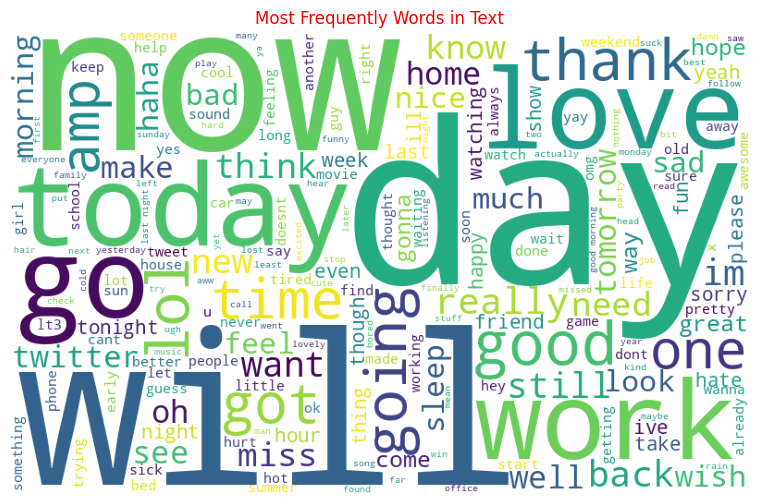

In [ ]:
wc = WordCloud(width=800, height=500, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wc)
plt.title('Most Frequently Words in Text', color='red')
plt.axis('off')
plt.show()

# **TextBlob for:**

* Spelling Correction

* Tekenization

* Detecting Nouns

* Language Translation and Detection





#### **SPELLING CORRECTION**

In [ ]:
!pip install textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from textblob import TextBlob
from textblob.exceptions import TranslatorError

In [ ]:
x = 'thankks forr waching it'

In [ ]:
x = TextBlob(x).correct()
x

TextBlob("thanks for watching it")

#### **TOKENIZATION**

In [ ]:
x = 'thanks#watching this video. please like it'

In [ ]:
TextBlob(x).words

WordList(['thanks', 'watching', 'this', 'video', 'please', 'like', 'it'])

In [ ]:
doc = nlp(x)
for token in doc:
    print(token)

thanks#watching
this
video
.
please
like
it


#### **DETECTING NOUNS**

In [ ]:
x = 'Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine to moon'

In [ ]:
doc = nlp(x)
for noun in doc.noun_chunks:
    print(noun)

Breaking News
Donald Trump
the president
the USA
a deal
mine
moon


#### **LANGUAGE TRANSLATION AND DETECTION**

>   Language Code: https://www.loc.gov/standards/iso639-2/php/code_list.php




In [ ]:
!pip install translate
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=60e01447e84eab8281c2f1d641eea19c5d474d7d257d951c6e39cd6a276a8f61
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


Detecting

In [ ]:
from langdetect import detect

In [ ]:
x

'Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine to moon'

In [ ]:
detect(x)

'en'

Translation

In [ ]:
from translate import Translator

In [ ]:
translator = Translator(to_lang="de")
translated_x = translator.translate(x)

In [ ]:
translated_x

'Eilmeldung: Donald Trump, der Präsident der USA, will einen Vertrag über die Mine to Moon unterzeichnen'

#### **USE TEXTBLOB'S INBUILT SENTIMENT CLASSIFIER**

In [ ]:
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
x = 'we all stands together. we are gonna win this fight'

In [ ]:
TextBlob(x, analyzer= NaiveBayesAnalyzer()).sentiment

Sentiment(classification='pos', p_pos=0.9180581552428241, p_neg=0.0819418447571765)